
# **AD_Bellenguez_2022_Finemapping_Top_Loci_Overview**

## **Background**

Top variants were identified if they met **either** of the following criteria:

- Belonged to a **95% credible set (CS)** with **minimum correlation (min_corr) ≥ 0.8**, or  
- Had a **posterior inclusion probability (PIP) > 0.05**.

A CS is considered spurious when meeting either of the criteria below, which is relatively sensitive to LD mismatch and tend to choose other models:
- `p_value > 1e-4`  
- `cs_corr > 0.3`

(For detailed model selection criteria, please refer to the [final_decision.ipynb](https://github.com/cumc/xqtl-analysis/blob/main/analysis/Wang_Columbia/EDA/Finemapping_results_summary/Automated_QC_EDA/final_desicion.ipynb).)

---

## **Summary**

### **Variant-Level Overview**

| Trait           | Top Variants | In 95% CS | Total Variants |
|------------------|---------------|------------|-----------------|
|AD_Bellenguez_2022| 2,851         | 913      | 8,954,288       |



---

### **Credible Set (CS)-Level Overview**

| Trait           | CS Count | Single-Variant CS | Proportion (%) |
|------------------|-----------|--------------------|-----------------|
|AD_Bellenguez_2022| 63        | 27                  | 42.9%           |



---

### **Study-Block Level Overview**

| Trait           | Blocks with CS |
|------------------|-----------------|
|AD_Bellenguez_2022| 49              |



#### **Study Blocks by CS Count**

- **AD_Bellenguez_2022**:  
  - 49 study_blocks contain CS  
  - 41 blocks have **1 CS**, 4 blocks have **2 CS**, 2 blocks have **3 CS**, 2 blocks have **4 CS**

#### **Study Blocks by Fine-Mapping Model**

- **AD_Bellenguez_2022**:  
  - Out of 49 study_blocks with CS:
    - 7 used **susie_rss_RSS_QC_RAISS_imputed**
    - 1 used **bayesian_conditional_regression_RSS_QC_RAISS_imputed**
    - 41 used **single_effect_NO_QC**

Note: I compared the study_blocks analyzed using BCR and BVSR models with the plots available on [Synapse](https://www.synapse.org/Synapse:syn65454789). The automated QC process effectively identifies most anomalous study_blocks and redirects them to the appropriate models**

In [1]:
library(data.table)
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()     masks data.table::between()
✖ dplyr::filter()      masks stats::filter()
✖ dplyr::first()       masks data.table::first()
✖ lubridate::hour()    masks data.table::hour()
✖ lubridate::isoweek() masks data.table::isoweek()
✖ dplyr::lag()         masks stats::lag()
✖ dplyr::last()        masks data.table::last()
✖ lubridate::mday()    masks data.table::mday()
✖ lubridate::minute()  masks data.table::minute()
✖ lubridate::month()   masks data.table::month()
✖ lubridate::quarter() masks data.table::quarter()
✖ lubridate::second()  masks data.table::second()
✖ purrr::transpose()   masks data.table::transpose()
✖ lubridate::wday() 

In [2]:
# Read in the top_loci table
top_loci <- fread("/home/rl3328/AD_GWAS_finemapping/AD_export_cs_corr_0.3_latest/export/AD_Bellenguez_2022.hg38_all_blocks.toploci.bed.gz")


## Summary

### Variant_level

In [3]:
# Top variants count by event_ID
top_loci |> group_by(event_ID) |> summarise(n = n()) |> arrange(desc(n))

event_ID,n
<chr>,<int>
AD_Bellenguez_2022,2851


In [4]:
# Get the top variants with 95% CS with min_corr = 0.8
top_loci_0.95 <- top_loci |> filter(cs_coverage_0.95 > 0)

In [5]:
# number of top variants in 95% CS with min_corr = 0.8 by event_ID
top_loci_0.95 |> group_by(event_ID) |> summarise(n = n()) |> arrange(desc(n))

event_ID,n
<chr>,<int>
AD_Bellenguez_2022,913


### Study_Block Level

In [6]:
# Create a column as a CS indicator
top_loci_0.95 = top_loci_0.95 |> mutate(cs = paste0(event_ID,"_", region_id,":"	,cs_coverage_0.95))

In [7]:
tail(top_loci_0.95)
dim(top_loci_0.95)

chr,pos,a1,a2,variant_ID,gene_ID,event_ID,cs_coverage_0.95,cs_coverage_0.7,cs_coverage_0.5,cs_coverage_0.95_purity0.5,cs_coverage_0.7_purity0.5,cs_coverage_0.5_purity0.5,PIP,region_id,finemap_model,cs
<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<lgl>,<lgl>,<lgl>,<dbl>,<chr>,<chr>,<chr>
8,27607412,G,A,8:27607412:A:G,chr8_27515963_29469590,AD_Bellenguez_2022,1,0,0,NA,NA,NA,0.04909698,chr8_27515963_29469590,single_effect_NO_QC,AD_Bellenguez_2022_chr8_27515963_29469590:1
8,27607795,C,T,8:27607795:T:C,chr8_27515963_29469590,AD_Bellenguez_2022,1,1,1,NA,NA,NA,0.20514640,chr8_27515963_29469590,single_effect_NO_QC,AD_Bellenguez_2022_chr8_27515963_29469590:1
8,27608640,C,T,8:27608640:T:C,chr8_27515963_29469590,AD_Bellenguez_2022,1,1,1,NA,NA,NA,0.23703061,chr8_27515963_29469590,single_effect_NO_QC,AD_Bellenguez_2022_chr8_27515963_29469590:1
8,27608664,C,T,8:27608664:T:C,chr8_27515963_29469590,AD_Bellenguez_2022,1,0,0,NA,NA,NA,0.03215781,chr8_27515963_29469590,single_effect_NO_QC,AD_Bellenguez_2022_chr8_27515963_29469590:1
8,27610169,T,C,8:27610169:C:T,chr8_27515963_29469590,AD_Bellenguez_2022,1,1,1,NA,NA,NA,0.23703061,chr8_27515963_29469590,single_effect_NO_QC,AD_Bellenguez_2022_chr8_27515963_29469590:1
8,27610986,A,C,8:27610986:C:A,chr8_27515963_29469590,AD_Bellenguez_2022,1,1,0,NA,NA,NA,0.09966819,chr8_27515963_29469590,single_effect_NO_QC,AD_Bellenguez_2022_chr8_27515963_29469590:1


[1] 913  17

In [8]:
# Study_blocks with CS for each event_ID(trait)
top_loci_0.95 |> count(event_ID, region_id) |> count(event_ID)

event_ID,n
<chr>,<int>
AD_Bellenguez_2022,49


In [14]:

# finemapping model at study_block level
top_loci_0.95 |> count(event_ID, region_id, finemap_model) |> count(finemap_model)

# CS Counts at study_block level
top_loci_0.95 |> count(cs_coverage_0.95, event_ID, region_id) |> group_by(cs_coverage_0.95) |> summarise(n = n()) |> arrange(desc(n))
top_loci_0.95 |> count(cs_coverage_0.95, event_ID, region_id) |> group_by(event_ID, region_id) |> summarise(cs_count = n()) |> count(cs_count)


finemap_model,n
<chr>,<int>
bayesian_conditional_regression_RSS_QC_RAISS_imputed,1
single_effect_NO_QC,41
susie_rss_RSS_QC_RAISS_imputed,7


cs_coverage_0.95,n
<int>,<int>
1,48
2,7
3,5
4,3


`summarise()` has grouped output by 'event_ID'. You can override using the
`.groups` argument.


event_ID,cs_count,n
<chr>,<int>,<int>
AD_Bellenguez_2022,1,41
AD_Bellenguez_2022,2,4
AD_Bellenguez_2022,3,2
AD_Bellenguez_2022,4,2


### CS level

In [12]:
# CS counts for each event_ID(trait)
top_loci_0.95 |> count(event_ID, cs) |> count(event_ID)

event_ID,n
<chr>,<int>
AD_Bellenguez_2022,63


In [13]:
top_loci_0.95 |> group_by(cs) |> summarise(n = n()) |> filter(n == 1)

cs,n
<chr>,<int>
AD_Bellenguez_2022_chr10_10500888_12817813:1,1
AD_Bellenguez_2022_chr11_119829118_122612025:1,1
AD_Bellenguez_2022_chr11_56858541_60339997:1,1
AD_Bellenguez_2022_chr14_92293029_94303139:2,1
AD_Bellenguez_2022_chr15_47690138_49901356:1,1
AD_Bellenguez_2022_chr15_49901356_51733753:1,1
AD_Bellenguez_2022_chr15_49901356_51733753:2,1
AD_Bellenguez_2022_chr15_63051119_66680537:1,1
AD_Bellenguez_2022_chr16_81293081_82644764:2,1


In [18]:
top_loci_0.95 |> filter(finemap_model == "bayesian_conditional_regression_RSS_QC_RAISS_imputed") |> count(event_ID, region_id) 

event_ID,region_id,n
<chr>,<chr>,<int>
AD_Bellenguez_2022,chr19_42346101_44935906,3


In [19]:
top_loci_0.95 |> filter(finemap_model == "susie_rss_RSS_QC_RAISS_imputed") |> count(event_ID, region_id) 


event_ID,region_id,n
<chr>,<chr>,<int>
AD_Bellenguez_2022,chr11_119829118_122612025,10
AD_Bellenguez_2022,chr14_92293029_94303139,25
AD_Bellenguez_2022,chr15_49901356_51733753,2
AD_Bellenguez_2022,chr16_81293081_82644764,8
AD_Bellenguez_2022,chr19_44935906_46842901,5
AD_Bellenguez_2022,chr19_90949_1507536,10
AD_Bellenguez_2022,chr6_40377803_42070711,2


## Finemapping Upset plots from manually checked top_loci table

In [9]:
# Read in the top_loci table
top_loci <- fread("/home/rl3328/AD_GWAS_finemapping/AD_export_cs_corr_0.3_latest/export/FunGen_xQTL.ADGWAS.Mar25.exported.toploci.bed.gz")
top_loci_0.95 <- top_loci |> filter(cs_coverage_0.95 > 0)


In [10]:
head(top_loci_0.95)
dim(top_loci_0.95)

#chr,start,end,a1,a2,variant_ID,gene_ID,event_ID,cs_coverage_0.95,cs_coverage_0.7,cs_coverage_0.5,PIP,conditional_effect,resource,lfsr,z
<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<lgl>,<chr>,<lgl>,<dbl>
1,161185601,161185602,A,G,chr1:161185602:G:A,chr1_158933969_162352348,AD_Jansen_2021,1,1,1,0.99011373,NA,AD_GWAS,NA,6.369505
1,207510846,207510847,G,T,chr1:207510847:T:G,chr1_205972031_208461272,AD_Bellenguez_2022,1,0,0,0.16533081,NA,AD_GWAS,NA,-11.865385
1,207510846,207510847,G,T,chr1:207510847:T:G,chr1_205972031_208461272,AD_Bellenguez_EADB_2022,1,1,1,0.15291225,NA,AD_GWAS,NA,-8.494280
1,207510846,207510847,G,T,chr1:207510847:T:G,chr1_205972031_208461272,AD_Kunkle_Stage1_2019,1,0,0,0.04243963,NA,AD_GWAS,NA,-7.962162
1,207524698,207524699,C,T,chr1:207524699:T:C,chr1_205972031_208461272,AD_Kunkle_Stage1_2019,1,0,0,0.01939925,NA,AD_GWAS,NA,-7.859551
1,207564731,207564732,C,T,chr1:207564732:T:C,chr1_205972031_208461272,AD_Bellenguez_EADB_2022,1,0,0,0.02119730,NA,AD_GWAS,NA,-8.188079


[1] 2609   16

In [11]:
unique(top_loci_0.95$event_ID)

[1] "AD_Jansen_2021"                         
[2] "AD_Bellenguez_2022"                     
[3] "AD_Bellenguez_EADB_2022"                
[4] "AD_Kunkle_Stage1_2019"                  
[5] "AD_Wightman_Excluding23andMe_2021"      
[6] "AD_Wightman_Full_2021"                  
[7] "AD_Wightman_ExcludingUKBand23andME_2021"
[8] "AD_Bellenguez_EADI_2022"

In [13]:
bellenguez_2022 <- top_loci_0.95[top_loci_0.95$event_ID == 'AD_Bellenguez_2022', ]
bellenguez_eadb_2022 <- top_loci_0.95[top_loci_0.95$event_ID == 'AD_Bellenguez_EADB_2022', ]
kunkle_2019 <- top_loci_0.95[top_loci_0.95$event_ID == 'AD_Kunkle_Stage1_2019', ]
wightman_ex23andme_2021 <- top_loci_0.95[top_loci_0.95$event_ID == 'AD_Wightman_Excluding23andMe_2021', ]
wightman_full_2021 <- top_loci_0.95[top_loci_0.95$event_ID == 'AD_Wightman_Full_2021', ]
wightman_exUKB23andme_2021 <- top_loci_0.95[top_loci_0.95$event_ID == 'AD_Wightman_ExcludingUKBand23andME_2021', ]



### 2.Block level 

In [21]:

# 3. Venn diagram for all datasets
all_list <- list(Bellenguez_EADB_2022 = unique(bellenguez_eadb_2022$gene_ID),
                Wightman_Full_2021 = unique(wightman_full_2021$gene_ID),
                Kunkle_2019 = unique(kunkle_2019$gene_ID),
                Wightman_ExcludingUKBand23andME_2021 = unique(wightman_exUKB23andme_2021$gene_ID),
                Wightman_Excluding23andMe_2021 = unique(wightman_ex23andme_2021$gene_ID),
                Bellenguez_2022 = unique(bellenguez_2022$gene_ID))

# For all datasets, we might want to use a different approach
# as ggVennDiagram works best with 2-5 sets
# We can use the upset plot for visualizing many sets

# Install if not already installed
# install.packages("UpSetR")
library(UpSetR)

# Convert the list to a format suitable for UpSetR
# CORRECTED VERSION: Don't use unique() to avoid removing duplicates across datasets
all_regions <- unlist(all_list)
# Count occurrences of each variant
region_counts <- table(all_regions)
# Keep only unique variant names but preserve their occurrence information
all_regions_unique <- names(region_counts)

# Create presence matrix correctly
presence_matrix <- matrix(0, nrow = length(all_regions_unique), ncol = length(all_list))
colnames(presence_matrix) <- names(all_list)
rownames(presence_matrix) <- all_regions_unique

# Fill the matrix with correct presence information
for (i in 1:length(all_list)) {
  presence_matrix[all_regions_unique %in% all_list[[i]], i] <- 1
}

# Print matrix summary to check
cat("Matrix dimensions:", dim(presence_matrix), "\n")
cat("Number of regions present in each dataset:\n")
colSums(presence_matrix)

# Print overlap statistics
cat("\nNumber of regions present in multiple datasets:\n")
row_sums <- rowSums(presence_matrix)
table(row_sums)

# Convert to data frame for UpSetR
presence_df <- as.data.frame(presence_matrix)


head(presence_df)

Matrix dimensions: 66 6 
Number of regions present in each dataset:


Bellenguez_EADB_2022                   Wightman_Full_2021 
                                  12                                   22 
                         Kunkle_2019 Wightman_ExcludingUKBand23andME_2021 
                                   9                                   16 
      Wightman_Excluding23andMe_2021                      Bellenguez_2022 
                                  21                                   50


Number of regions present in multiple datasets:


row_sums
 1  2  3  4  5  6 
37 10  9  6  2  2 

,Bellenguez_EADB_2022,Wightman_Full_2021,Kunkle_2019,Wightman_ExcludingUKBand23andME_2021,Wightman_Excluding23andMe_2021,Bellenguez_2022
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1_205972031_208461272,1,0,1,0,0,1
chr10_10500888_12817813,0,1,0,0,1,1
chr10_122047725_123788803,0,1,0,0,0,0
chr10_57667362_59558848,0,0,0,0,0,1
chr10_59558848_62446953,0,0,0,0,0,1
chr10_80126158_82231647,0,0,0,0,0,1


pdf 
  2

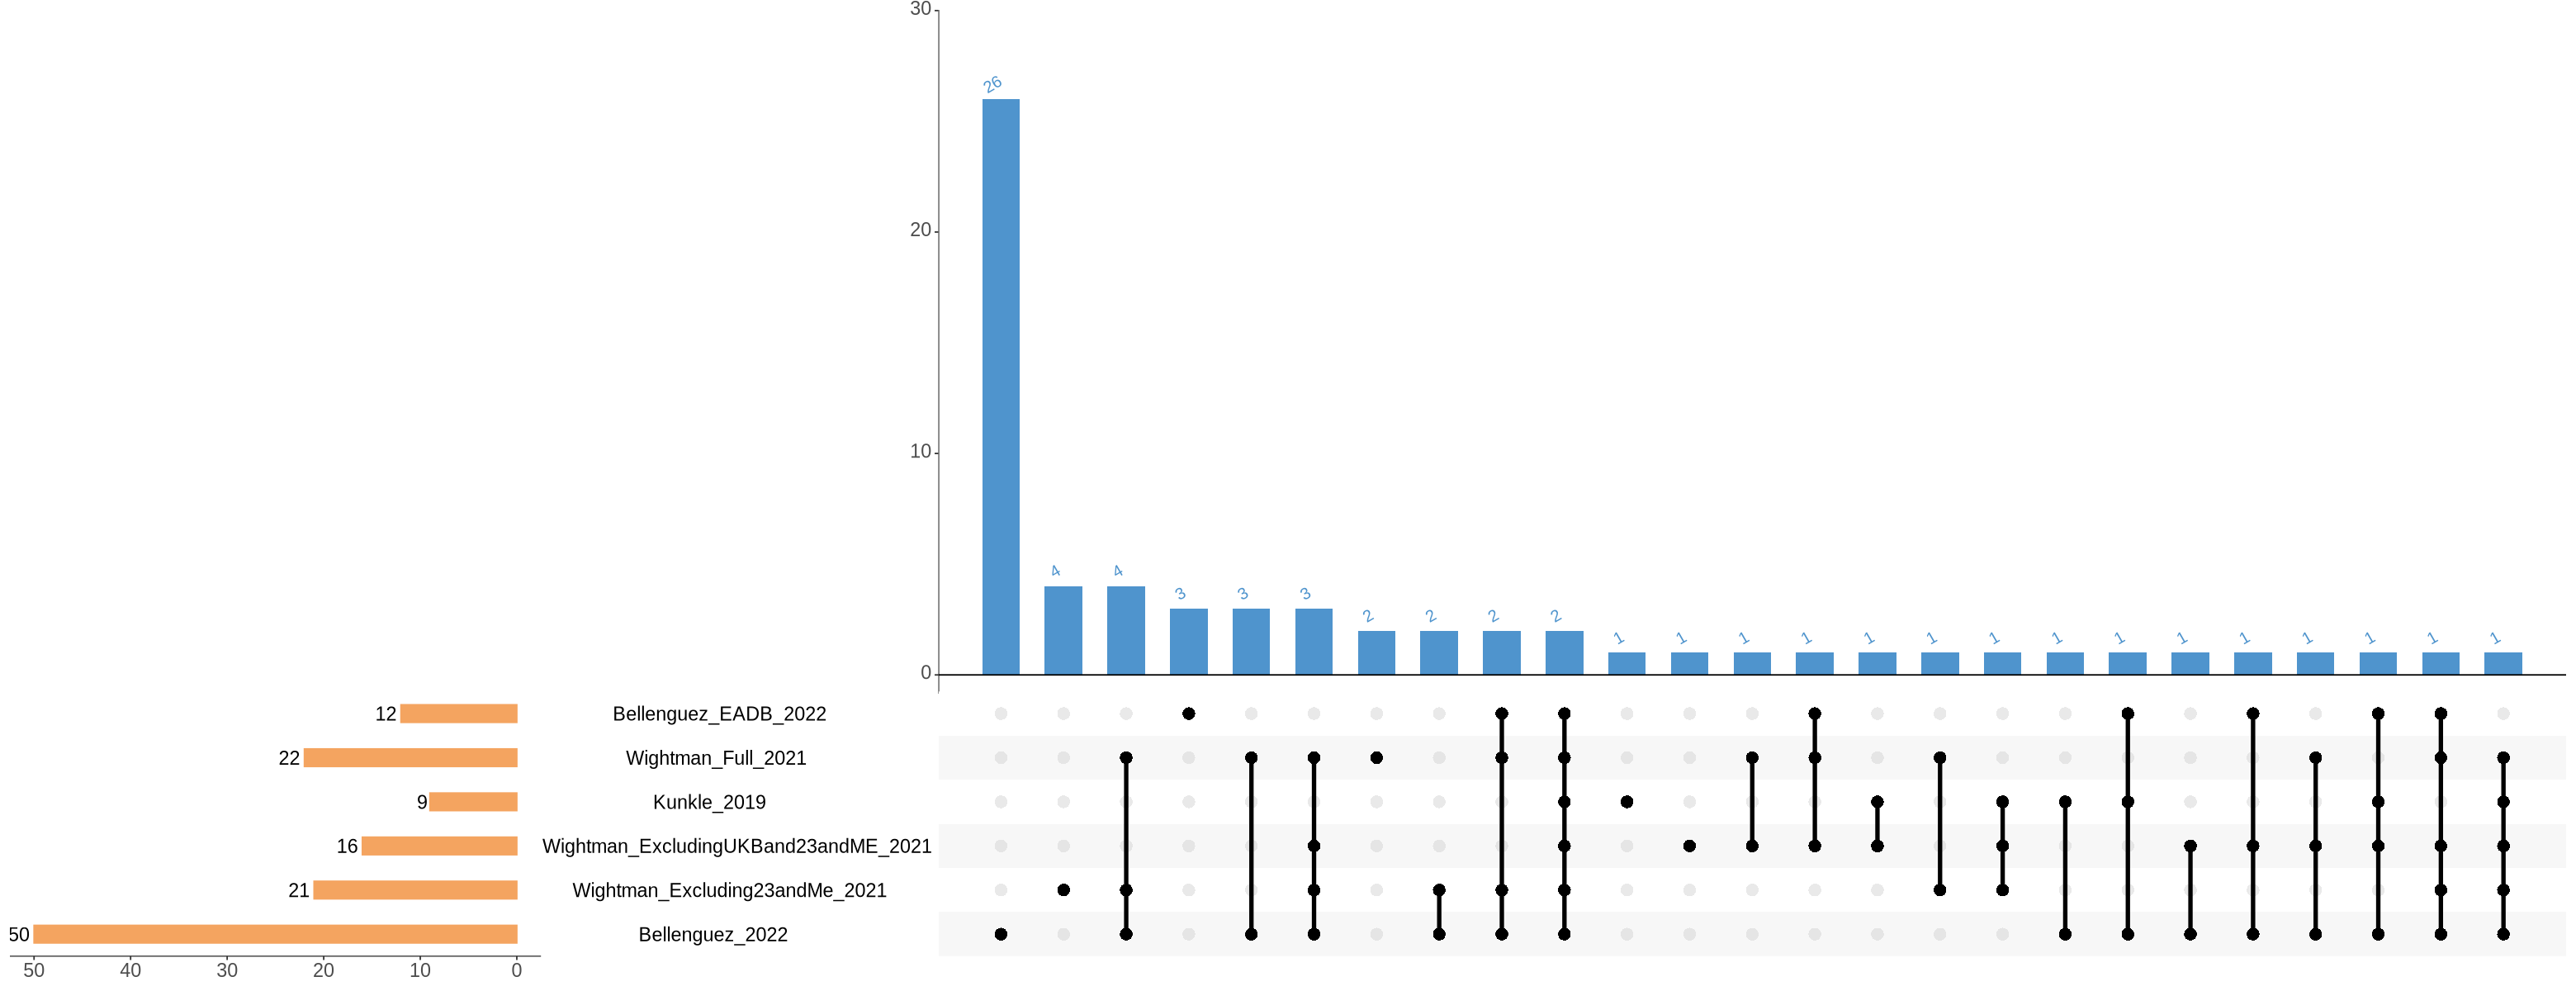

In [32]:
# Save the upset plot
# Choose one of the following formats:


options(repr.plot.width = 26, repr.plot.height = 10)


p = upset(presence_df, 
      sets = c("Bellenguez_2022", "Wightman_Excluding23andMe_2021", "Wightman_ExcludingUKBand23andME_2021",
             "Kunkle_2019", "Wightman_Full_2021", "Bellenguez_EADB_2022"),
      keep.order = T,
      nintersects = 100,
      order.by = "freq",
      main.bar.color = "steelblue3",
      matrix.color = "black",
      sets.bar.color = "sandybrown",
      set_size.show = TRUE,
      number.angles = 30,
      text.scale = c(2,2,2,2,2),
      point.size = 4,
      line.size = 1.5,
      mainbar.y.label = "",
      sets.x.label = NULL,
      mb.ratio = c(0.7, 0.3),  # Adjust ratio between main bar and matrix
      )
print(p)
# Save the plot to a file
png("AD_upset_plot_ucos_block.png", width = 26, height = 10, units = "in", res = 300)
print(p)
dev.off()

In [26]:
presence_df_cos <- filter(presence_df, rowSums(presence_df) > 1)
dim(presence_df_cos)

[1] 29  6

pdf 
  2

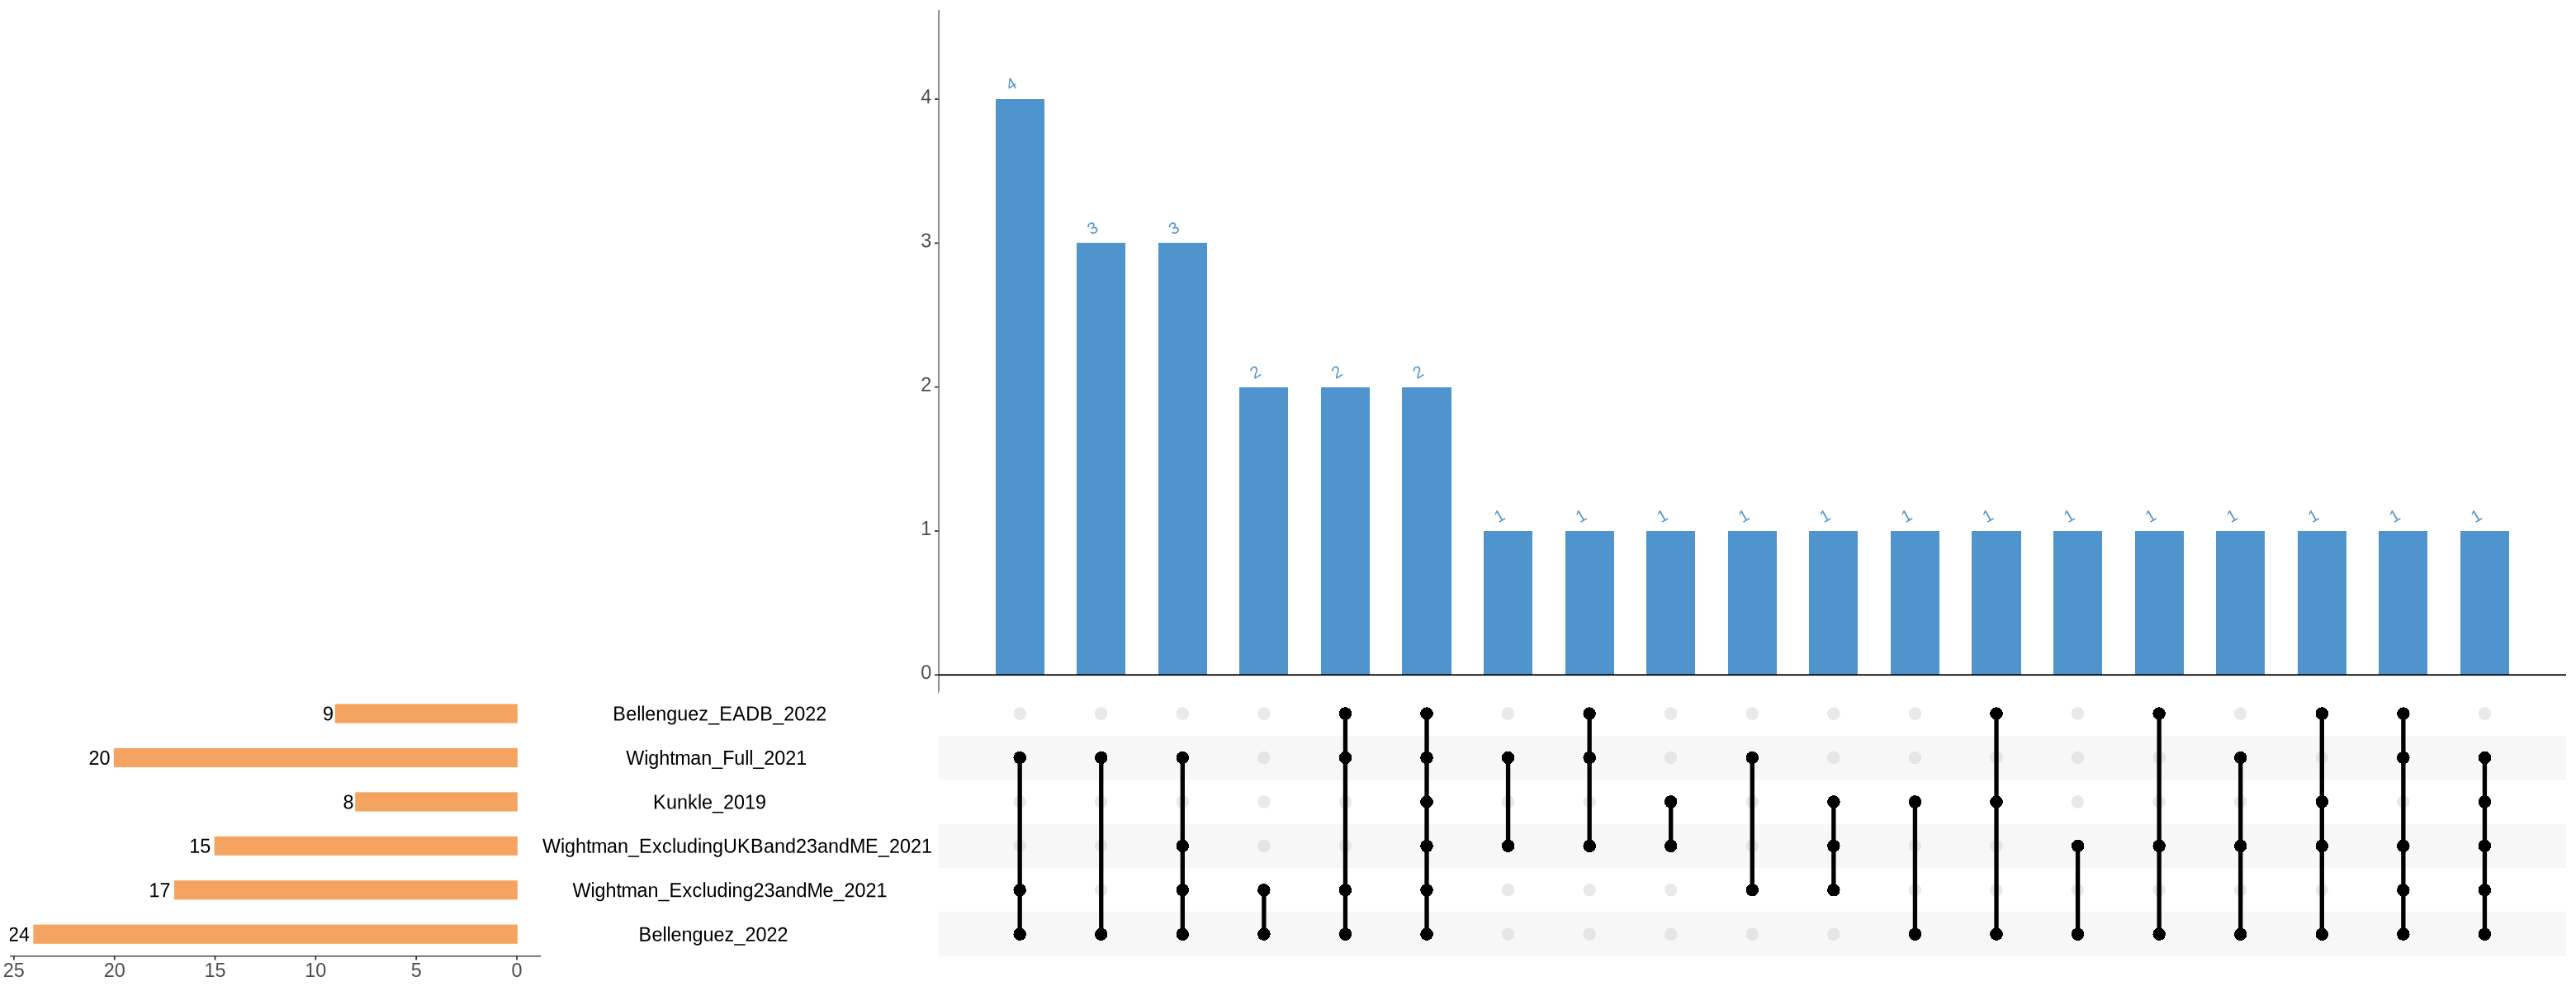

In [31]:
# Save the upset plot
# Choose one of the following formats:


options(repr.plot.width = 26, repr.plot.height = 10)


p = upset(presence_df_cos, 
      sets = c("Bellenguez_2022", "Wightman_Excluding23andMe_2021", "Wightman_ExcludingUKBand23andME_2021",
             "Kunkle_2019", "Wightman_Full_2021", "Bellenguez_EADB_2022"),
      keep.order = T,
      nintersects = 100,
      order.by = "freq",
      main.bar.color = "steelblue3",
      matrix.color = "black",
      sets.bar.color = "sandybrown",
      set_size.show = TRUE,
      number.angles = 30,
      text.scale = c(2,2,2,2,2),
      point.size = 4,
      line.size = 1.5,
      mainbar.y.label = "",
      sets.x.label = NULL,
      mb.ratio = c(0.7, 0.3),  # Adjust ratio between main bar and matrix
      )
print(p)
# Save the plot to a file
png("AD_upset_plot_cos_block.png", width = 26, height = 10, units = "in", res = 300)
print(p)
dev.off()